In [38]:
import numpy as np
from sklearn import datasets, tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

Для выполнения задания используйте набор данных boston из библиотеки sklearn 
https://scikit-learn.org/stable/datasets/index.html#boston-dataset

**1. Загрузите данные с помощью библиотеки sklearn.**

In [2]:
data = datasets.load_boston()
X = data['data']
y = data['target']

X.shape, y.shape

((506, 13), (506,))

In [3]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [5]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

**2. Разделите выборку на обучающую (75%) и контрольную (25%).**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [7]:
X_train.shape, X_test.shape

((379, 13), (127, 13))

**3. Заведите массив для объектов DecisionTreeRegressor (они будут использоваться в качестве базовых алгоритмов) и для вещественных чисел (коэффициенты перед базовыми алгоритмами).**

**4. В цикле обучите последовательно 50 решающих деревьев с параметрами max_depth=5 и random_state=42 (остальные параметры - по умолчанию). Каждое дерево должно обучаться на одном и том же множестве объектов, но ответы, которые учится прогнозировать дерево, будут меняться в соответствие с отклонением истинных значений от предсказанных.**

**5. Попробуйте всегда брать коэффициент равным 0.9. Обычно оправдано выбирать коэффициент значительно меньшим - порядка 0.05 или 0.1, но на стандартном наборе данных будет всего 50 деревьев, возьмите для начала шаг побольше.**

**6. В процессе реализации обучения вам потребуется функция, которая будет вычислять прогноз построенной на данный момент композиции деревьев на выборке X. Реализуйте ее. Эта же функция поможет вам получить прогноз на контрольной выборке и оценить качество работы вашего алгоритма с помощью mean_squared_error в sklearn.metrics.**

In [123]:
def gb_predict(X, trees, coeffs):
    m,n = X.shape
    iterations = len(trees)
    result = np.zeros(m)
    
    for i in range(iterations):
        result += coeffs[i] * trees[i].predict(X)
    
    return result    

In [76]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [127]:
trees_1 = []
coeffs_1 = []

iter = 50
last_y_pred_1 = y_train

for i in range(iter):
    model = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, last_y_pred_1)
    coef = 0.9
    trees_1.append(model) 
    coeffs_1.append(coef)
    last_y_pred_1 = y_train - gb_predict(X_train, trees_1, coeffs_1)

In [128]:
y_test_pred_1 = gbm_predict(X_test, trees_1, coeffs_1)
print(f'RMSE: {rmse(y_test, y_test_pred_1)}')

RMSE: 4.043482624592399


**8. Попробуйте уменьшать вес перед каждым алгоритмом с каждой следующей итерацией по формуле 0.9 / (1.0 + i), где i - номер итерации (от 0 до 49). Какое получилось качество на контрольной выборке?**

In [129]:
trees_2 = []
coeffs_2 = []

iter_2 = 50
last_y_pred_2 = y_train

for i in range(iter_2):
    model = tree.DecisionTreeRegressor(max_depth=5, random_state=42)
    model.fit(X_train, last_y_pred_2)
    coef = 0.9 / (1.0 + i)
    trees_2.append(model) 
    coeffs_2.append(coef)
    last_y_pred_2 = y_train - gb_predict(X_train, trees_2, coeffs_2)

y_test_pred_2 = gbm_predict(X_test, trees_2, coeffs_2)
print(f'RMSE: {rmse(y_test, y_test_pred_2)}')

RMSE: 3.7670141013755623


**9. Исследуйте, переобучается ли градиентный бустинг с ростом числа итераций, а также с ростом глубины деревьев. Постройте графики. Какие выводы можно сделать?**

In [130]:
def build_and_fit_model(X_train, y_train, iterations = 50, depth = 5):
    trees = []
    coeffs = []
    last_y_pred = y_train
    
    for i in range(iterations):
        model = tree.DecisionTreeRegressor(max_depth=depth, random_state=42)
        model.fit(X_train, last_y_pred)
        
        coef = 0.9 / (1.0 + i)
        
        trees.append(model) 
        coeffs.append(coef)
        
        last_y_pred = y_train - gb_predict(X_train, trees, coeffs)
    
    def predictor(X):
        return gbm_predict(X, trees, coeffs)
    
    return predictor

In [ ]:
rmse(y_test, train_and_predict(X_train, y_train, X_test))

In [69]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
iterations_count = np.linspace(10, 100, 15).astype(int)
iter_train_errors = []
iter_valid_errors = []

for it_count in iterations_count:
    predict = build_and_fit_model(X_train, y_train, iterations = it_count)
    
    iter_train_errors.append(rmse(y_train, predict(X_train)))
    iter_valid_errors.append(rmse(y_test, predict(X_test)))
    #boost = GradientBoostingRegressor(n_estimators=it_count, max_depth=5, random_state=42)
    #boost.fit(X_train, y_train)
    #iter_train_errors.append(rmse(y_train, boost.predict(X_train)))
    #iter_valid_errors.append(rmse(y_test, boost.predict(X_test)))

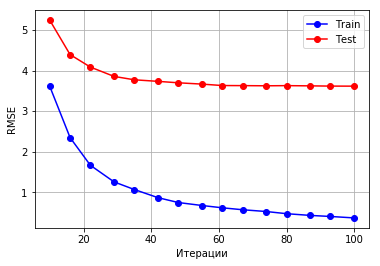

In [72]:
plt.plot(iterations_count, iter_train_errors, marker='o', color='blue', label='Train')
plt.plot(iterations_count, iter_valid_errors, marker='o', color='red', label='Test')
plt.xlabel('Итерации')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

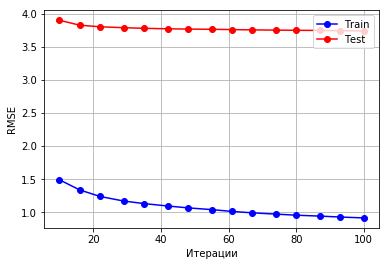

In [66]:
plt.plot(iterations_count, iter_train_errors, marker='o', color='blue', label='Train')
plt.plot(iterations_count, iter_valid_errors, marker='o', color='red', label='Test')
plt.xlabel('Итерации')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [134]:
depths = np.linspace(2, 50, 20).astype(int)
depth_train_errors = []
depth_valid_errors = []

for depth_num in depths:
    #predict = build_and_fit_model(X_train, y_train, depth = depth_num)
    
    #depth_train_errors.append(rmse(y_train, predict(X_train)))
    #depth_valid_errors.append(rmse(y_test, predict(X_test)))
    boost = GradientBoostingRegressor(n_estimators=50, max_depth=depth_num, random_state=42)
    boost.fit(X_train, y_train)
    depth_train_errors.append(rmse(y_train, boost.predict(X_train)))
    depth_valid_errors.append(rmse(y_test, boost.predict(X_test)))

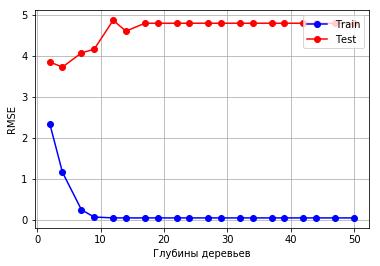

In [135]:
plt.plot(depths, depth_train_errors, marker='o', color='blue', label='Train')
plt.plot(depths, depth_valid_errors, marker='o', color='red', label='Test')
plt.xlabel('Глубины деревьев')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

In [ ]:
plt.plot(depths, depth_train_errors, marker='o', color='blue', label='Train')
plt.plot(depths, depth_valid_errors, marker='o', color='red', label='Test')
plt.xlabel('Глубины деревьев')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend(loc="upper right")
plt.show()

**10. Сравните качество, получаемое с помощью градиентного бустинга с качеством работы линейной регрессии. Для этого обучите LinearRegression из sklearn.linear_model (с параметрами по умолчанию) на обучающей выборке и оцените для прогнозов полученного алгоритма на тестовой выборке RMSE.**

In [22]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)
rmse(y_test, y_pred_linear)

5.6958350306172365